<h2 id="myheading"> Table of contents </h2>

1. [Artificial neural networks](#ANN)
* [Convolutional neural networks](#CNN)
* [Recurrent neural networks](#RNN)
* [Self Organizing Maps](#SOM)
* [Mega case study: Hybrid model](#hybrid)
* [Boltzmann Machines](#bm)
* [AutoEncoders](#autoencoder)

Create environment as below:
From anaconda prompt: `create -n tensorflow_env python=3.5 anaconda`

`activate tensorflow_env`

`conda install theano`

`conda install mingw libpython`

`pip install tensorflow`

`pip install keras` 

Then run `spyder` or `jupyter notebook`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## <a name="ANN"> Artificial Neural Networks </a>

### <font color='red'> Data preprocessing </font>

#### <font color='blue'> Data input </font>

In [19]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
#dataset.shape

(10000, 14)

In [20]:
# Split the data into independent and dependent variables 
X = dataset.iloc[:,3:13]
y = dataset.iloc[:, 13]

In [21]:
print(X.shape, y.shape)

(10000, 10) (10000,)


In [13]:
#X[0:3]

In [22]:
X.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

#### <font color='blue'> Categorical variables </font>

In [23]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [27]:
label_encoder_gender = LabelEncoder()
X.iloc[:, 2] = label_encoder_gender.fit_transform(X.iloc[:,2])
X = pd.DataFrame(X)
# Lets rename the gender column as Gender_Male, as 1s are Males and 0s are Females 
X.rename(columns = {"Gender": "Male"}, inplace=True)
X[0:3]

,CreditScore,Geography,Gender_Male,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,0,42,2,0.00,1,1,1,101348.88
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58
2,502,France,0,42,8,159660.80,3,1,0,113931.57


In [28]:
X = pd.get_dummies(X, columns=["Geography"])
X[0:3]

,CreditScore,Gender_Male,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0


In [29]:
# Drop the dummy column for France
X = X.drop(["Geography_France"], axis=1)
X[0:3]

,CreditScore,Gender_Male,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,0,0


####  <font color='blue'> Train test split </font>

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [32]:
type(X_train)

pandas.core.frame.DataFrame

#### <font color='blue'> Feature scaling </font>

In [33]:
from sklearn.preprocessing import StandardScaler

In [36]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [37]:
X_train[0:3]

array([[ 0.16958176, -1.09168714, -0.46460796,  0.00666099, -1.21571749,
         0.8095029 ,  0.64259497, -1.03227043,  1.10643166, -0.5698444 ,
         1.74309049],
       [-2.30455945,  0.91601335,  0.30102557, -1.37744033, -0.00631193,
        -0.92159124,  0.64259497,  0.9687384 , -0.74866447,  1.75486502,
        -0.57369368],
       [-1.19119591, -1.09168714, -0.94312892, -1.031415  ,  0.57993469,
        -0.92159124,  0.64259497, -1.03227043,  1.48533467, -0.5698444 ,
        -0.57369368]])

### <font color='red'> Building the ANN </font>

In [38]:
import keras
from keras.models import Sequential # Required to initialize the model
from keras.layers import Dense

Using TensorFlow backend.


In [41]:
# Initializing the ANN 

classifier = Sequential()

# Choosing six nodes in hidden layer, as avg of 11 (input) and 1 (output)
classifier.add(Dense(units = 6, input_dim=11, kernel_initializer="uniform", activation="relu"))

classifier.add(Dense(units = 6, kernel_initializer="uniform", activation="relu"))
classifier.add(Dense(units = 1, kernel_initializer="uniform", activation="sigmoid"))

In [42]:
classifier.compile(loss= 'binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [43]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [44]:
classifier.fit(X_train, y_train, batch_size=10, epochs=100)

Epoch 1/100
8000/8000 [==============================] - 2s 290us/step - loss: 0.4832 - acc: 0.7957
Epoch 2/100
8000/8000 [==============================] - 2s 244us/step - loss: 0.4269 - acc: 0.7960
Epoch 3/100
8000/8000 [==============================] - 2s 238us/step - loss: 0.4211 - acc: 0.8172
Epoch 4/100
8000/8000 [==============================] - 2s 240us/step - loss: 0.4151 - acc: 0.8286
Epoch 5/100
8000/8000 [==============================] - 2s 200us/step - loss: 0.4109 - acc: 0.8320
Epoch 6/100
8000/8000 [==============================] - 2s 208us/step - loss: 0.4074 - acc: 0.8331
Epoch 7/100
8000/8000 [==============================] - 2s 232us/step - loss: 0.4055 - acc: 0.8347
Epoch 8/100
8000/8000 [==============================] - ETA: 0s - loss: 0.4023 - acc: 0.835 - 2s 201us/step - loss: 0.4039 - acc: 0.8346
Epoch 9/100
8000/8000 [==============================] - 2s 237us/step - loss: 0.4022 - acc: 0.8357
Epoch 10/100
8000/8000 [==============================] - 2s 2

In [48]:
classifier.history.params

{'batch_size': 10,
 'epochs': 100,
 'steps': None,
 'samples': 8000,
 'verbose': 1,
 'do_validation': False,
 'metrics': ['loss', 'acc']}

In [50]:
# Making predictions and evaluating the model #
y_pred = classifier.predict_classes(X_test)

In [52]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1510   85]
 [ 194  211]]


In [53]:
y_test.value_counts()

0    1595
1     405
Name: Exited, dtype: int64

In [54]:
cm_df = pd.DataFrame({'Predicted 0': [cm[0,0], cm[1,0]],
                     'Predicted 1': [cm[0,1], cm[1,1]]},
                    index = ['Actual 0', 'Actual 1'])
print(cm_df)

          Predicted 0  Predicted 1
Actual 0         1510           85
Actual 1          194          211


In [49]:
epochs = classifier.history.epoch
acc = classifier.history.history['acc']
loss = classifier.history.history['loss']

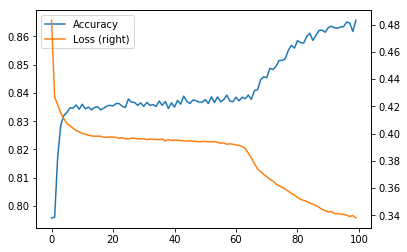

In [55]:
pd.Series(acc).plot(label='Accuracy', legend=True)
pd.Series(loss).plot(secondary_y=True, label='Loss', legend=True)
plt.show() 

In [56]:
eg_customer = X[X.index==0] # Extracting the first row as a dataframe
eg_customer.CreditScore = 600
X.Male = 1
X.Age = 40
X.Tenure = 3
X.Balance = 60000
X.NumOfProducts = 2
X.HasCrCard = 1
X.IsActiveMember = 1 
X.EstimatedSalary = 50000
X.Geography_Germany=0
X.Geography_Spain=0
eg_customer

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,CreditScore,Gender_Male,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
0,600,0,42,2,0.0,1,1,1,101348.88,0,0


In [57]:
customer_pred = classifier.predict_classes(eg_customer)
customer_pred

array([[1]])

__Conclusion__ : We don't give this customer a loan


### <font color='red'>  Model evaluation </font>

#### <font color='green'> k-fold cross validation </font>

In [58]:
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier # Wrapper integrates the sklearn kfold CV with the Keras classifier

In [59]:
def build_classifier():
    import keras
    from keras.models import Sequential
    from keras.layers import Dense
    classifier = Sequential()
    classifier.add(Dense(6, input_dim=11, activation='relu', kernel_initializer='uniform'))
    classifier.add(Dense(6, activation='relu', kernel_initializer='uniform'))
    classifier.add(Dense(1, activation='sigmoid', kernel_initializer='uniform'))
    classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return classifier #Return the local classifier

In [ ]:
# Global classifier 
classifier = KerasClassifier(build_fn = build_classifier, epochs=100, batch_size=10)

# Cross val score 
# if __name__ == "__main__":
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10, verbose=1, n_jobs=-1)

In [43]:
mean = accuracies.mean()
variance = accuracies.std()
print("Mean is {:.3%} and stdev is {:.3%}".format(mean, variance))

Mean is 84.612% and stdev is 1.411%


### <font color='red'> Model improvements </font>


#### <font color='green'> Dropout regularization </font>

In [46]:
from keras.models import Sequential
from keras.layers import Dropout, Dense

In [48]:
classifier = Sequential()
classifier.add(Dense(6, input_dim=11, kernel_initializer='uniform', activation='relu'))
classifier.add(Dropout(p=0.1)) #Fraction of inputs to dropout. Keep increasing till overfitting improves
classifier.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

C:\Users\sridevi.tolety\AppData\Local\conda\conda\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier.fit(X_train, y_train, epochs=100, batch_size=10)

#### <font color='green'> Hyperparameter tuning </font>

In [17]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [34]:
# Grid of parameters to tune 
parameters = {'batch_size':[10, 25, 32],
              'epochs':[50, 100],
             'optimizer':['adam', 'rmsprop']}

In [ ]:
# The funciton to feed into the sklearn keras classifier wrapper
def build_classifier(optimizer):
    print("Testing batch size={}, epochs={} and optimizer={}".format(batch_size, epochs, optimizer))
    classifier = Sequential()
    classifier.add(Dense(output_dim=6, input_dim=11, kernel_initializer='uniform', activation='relu'))
    classifier.add(Dense(output_dim=6, kernel_initializer='uniform', activation='relu'))
    classifier.add(Dense(output_dim=1, activation='sigmoid'))
    classifier.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return classifier

In [ ]:
classifier = KerasClassifier(build_fn = build_classifier)

In [45]:
grid_search = GridSearchCV(estimator=classifier, scoring='accuracy', param_grid=parameters, cv=10,verbose=1)

In [47]:
grid_search = grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


C:\Users\sridevi.tolety\AppData\Local\conda\conda\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", units=6, input_dim=11, activation="relu")`
  after removing the cwd from sys.path.
C:\Users\sridevi.tolety\AppData\Local\conda\conda\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", units=6, activation="relu")`
  """
C:\Users\sridevi.tolety\AppData\Local\conda\conda\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  


Epoch 1/50
7200/7200 [==============================] - 4s 618us/step - loss: 0.4679 - acc: 0.7969
Epoch 2/50
7200/7200 [==============================] - 2s 276us/step - loss: 0.4274 - acc: 0.7971
Epoch 3/50
7200/7200 [==============================] - 2s 245us/step - loss: 0.4206 - acc: 0.8108
Epoch 4/50
7200/7200 [==============================] - 2s 289us/step - loss: 0.4170 - acc: 0.8210
Epoch 5/50
7200/7200 [==============================] - 2s 291us/step - loss: 0.4154 - acc: 0.8289
Epoch 6/50
7200/7200 [==============================] - 2s 260us/step - loss: 0.4140 - acc: 0.8287
Epoch 7/50
7200/7200 [==============================] - 2s 262us/step - loss: 0.4122 - acc: 0.8308
Epoch 8/50
7200/7200 [==============================] - 2s 260us/step - loss: 0.4111 - acc: 0.8310
Epoch 9/50
7200/7200 [==============================] - 2s 280us/step - loss: 0.4103 - acc: 0.8317
Epoch 10/50
7200/7200 [==============================] - 2s 303us/step - loss: 0.4093 - acc: 0.8322
Epoch 11/

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed: 259.3min finished


Epoch 1/100
8000/8000 [==============================] - 9s 1ms/step - loss: 0.5225 - acc: 0.7958
Epoch 2/100
8000/8000 [==============================] - 2s 236us/step - loss: 0.4297 - acc: 0.7960
Epoch 3/100
8000/8000 [==============================] - 2s 239us/step - loss: 0.4235 - acc: 0.7986
Epoch 4/100
8000/8000 [==============================] - 2s 241us/step - loss: 0.4183 - acc: 0.8231
Epoch 5/100
8000/8000 [==============================] - 2s 238us/step - loss: 0.4146 - acc: 0.8290
Epoch 6/100
8000/8000 [==============================] - 2s 238us/step - loss: 0.4114 - acc: 0.8309
Epoch 7/100
8000/8000 [==============================] - 2s 241us/step - loss: 0.4091 - acc: 0.8327
Epoch 8/100
8000/8000 [==============================] - 2s 243us/step - loss: 0.4068 - acc: 0.8344
Epoch 9/100
8000/8000 [==============================] - 2s 241us/step - loss: 0.4053 - acc: 0.8346
Epoch 10/100
8000/8000 [==============================] - 2s 240us/step - loss: 0.4036 - acc: 0.8340
E

In [54]:
best_params = grid_search.best_params_
best_acc = grid_search.best_score_

In [52]:
best_params

{'batch_size': 25, 'epochs': 100, 'optimizer': 'adam'}

In [55]:
best_acc

0.845625

## <a name="CNN"> Convolutional Neural Networks </a>

Input image -> Convolve over many feature maps -> Convolutional Layer -> Rectifier function 

-> Pooling

-> Flattenning

-> Fully connected

ReLU - Adds non-linearity

### <font color='red'> Data preprocessing </font>

Folder structure:
1. Train data: 
    * Cats: 4000
    * Dogs: 4000
2. Test data:
    * Cats: 1000
    * Dogs: 1000

Go through this and implement: 

https://github.com/tflearn/tflearn/blob/master/examples/basics/use_dask.py

In [1]:
# import findspark
# findspark.init()

In [2]:
# import pyspark
# from pyspark import SparkContext, SparkConf
# conf = SparkConf().setAppName('Elephas_App').setMaster('local[8]')
# sc =  SparkContext(conf=conf)

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten 

C:\Users\sridevi.tolety\AppData\Local\conda\conda\envs\tensorflow_env\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
classifier = Sequential()

#### Step 1: Convolution 

In [3]:
classifier.add(Convolution2D(filters=32, kernel_size=(3,3), input_shape=(64, 64, 3), activation='relu')) 
# input_shape: (3, 256, 256) means 3 channels (for RGB) with 256*256 pixels each 
# But this is the order of Theano backend, whereas we are using Tensorflow backend 
# So make is (256, 256, 3) 

#### Step 2: Pooling 

In [4]:
classifier.add(MaxPooling2D(pool_size=(2,2)))

#### Step 3: Flattening 

In [5]:
classifier.add(Flatten())

#### Step 4: Full connection

In [6]:
classifier.add(Dense(units=128, activation='relu')) # units is output_dim
classifier.add(Dense(units=1, activation='sigmoid'))

In [7]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 30752)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               3936384   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 3,937,409
Trainable params: 3,937,409
Non-trainable params: 0
_________________________________________________________________


In [8]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Fitting the CNN to the images 

https://keras.io/preprocessing/image/


Enrich and augment our dataset to reduce overfitting by adding more images 

In [9]:
from keras.preprocessing.image import ImageDataGenerator

# This class allows you to:
# 1. Configure random transformations and normalization operations to be done on your image data during training
# 2. Instantiate generators of augmented image batches (and their labels) via .flow(data, labels) or .flow_from_directory(directory). 
# These generators can then be used with the Keras model methods that accept data generators as inputs, fit_generator, evaluate_generator and predict_generator.

In [10]:
train_datagen = ImageDataGenerator(
        rescale=1./255, #to make all pixel values between 0 and 1 
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [11]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
training_set = train_datagen.flow_from_directory('CNN_dataset/training_set',
                                                    target_size=(64, 64),#dimensions expected by 64 
                                                    batch_size=32,
                                                    class_mode='binary')

Found 8000 images belonging to 2 classes.


In [14]:
test_set = test_datagen.flow_from_directory('CNN_dataset/test_set',
                                                        target_size=(64, 64),
                                                        batch_size=32,
                                                        class_mode='binary')

Found 2000 images belonging to 2 classes.


** create an RDD from numpy arrays**

In [ ]:
# from elephas.utils.rdd_utils import to_simple_rdd
# rdd = to_simple_rdd(sc, training_set, test_set)

In [ ]:
# from elephas.spark_model import SparkModel

# spark_model = SparkModel(model, frequency='epoch', mode='asynchronous')
# # spark_model.fit(rdd, epochs=1, batch_size=32, verbose=0, validation_split=0.1)

In [15]:
classifier.fit_generator(training_set,
                    steps_per_epoch=8000,
                    epochs=1,
                    validation_data=test_set,
                    validation_steps=800)

Epoch 1/1
8000/8000 [==============================] - 37350s 5s/step - loss: 0.3847 - acc: 0.8199 - val_loss: 0.8025 - val_acc: 0.7320


In [ ]:
classifier.fit_generator(training_set,
                    steps_per_epoch=8000,
                    epochs=1,
                    validation_data=test_set,
                    validation_steps=800)

Epoch 1/1
7488/8000 [===========================>..] - ETA: 42:11 - loss: 0.3951 - acc: 0.8141

### Making new predictions 

In [16]:
import numpy as np 
from keras.preprocessing import image

In [18]:
test_image = image.load_img('CNN_dataset/single_prediction/cat_or_dog_1.jpg', target_size=(64,64))
#target size should be same dim as training data

test_image = image.img_to_array(test_image) # create a 3-dim array from original 2-dim image 
test_image = np.expand_dims(test_image, axis=0) # add one more dimension corresponding to the batch (single input not accepted)
# Without this, will get error saying 4 dims expected 
result = classifier.predict(test_image)

In [19]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [20]:
if result[0][0]==1:
    prediction="dog"
else:
    prediction="cat"

In [21]:
prediction

'dog'

In [22]:
test_image = image.load_img('CNN_dataset/single_prediction/cat_or_dog_2.jpg', target_size=(64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)

if result[0][0]==1:
    prediction="dog"
else:
    prediction="cat"
    
prediction

'dog'

high accuracy solution, see below:

https://www.udemy.com/deeplearning/learn/v4/questions/2276518

## <a name="RNN"> Recurrent Neural Networks </a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Import the training set 

In [2]:
df_train = pd.read_csv("Google_Stock_Price_Train.csv")

In [3]:
df_train.shape

(1258, 6)

In [4]:
df_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [10]:
df_train.Date = pd.to_datetime(df_train.Date, format="%m/%d/%Y")

Date       object
Open      float64
High      float64
Low       float64
Close      object
Volume     object
dtype: object
Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close             object
Volume            object
dtype: object
        Date    Open    High     Low   Close      Volume
0 2012-01-03  325.25  332.83  324.97  663.59   7,380,500
1 2012-01-04  331.27  333.87  329.08  666.45   5,749,400
2 2012-01-05  329.83  330.75  326.89  657.21   6,590,300
3 2012-01-06  328.34  328.77  323.68  648.24   5,405,900
4 2012-01-09  322.04  322.29  309.46  620.76  11,688,800


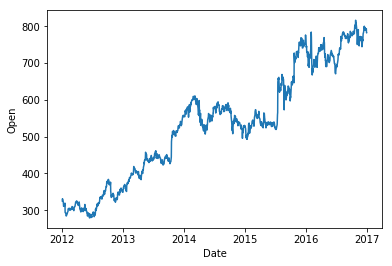

In [15]:
plt.plot(df_train.Date, df_train.Open)
plt.xlabel("Date")
plt.ylabel("Open")
plt.show()

In [13]:
print(df_train.head())

        Date    Open    High     Low   Close      Volume
0 2012-01-03  325.25  332.83  324.97  663.59   7,380,500
1 2012-01-04  331.27  333.87  329.08  666.45   5,749,400
2 2012-01-05  329.83  330.75  326.89  657.21   6,590,300
3 2012-01-06  328.34  328.77  323.68  648.24   5,405,900
4 2012-01-09  322.04  322.29  309.46  620.76  11,688,800


In [7]:
training_set = df_train.iloc[:, 1:2].values # We get numpy array

In [8]:
training_set 

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

## <font color='red'> Feature scaling </red> 

### Standardization 
$ x_{stand} = \frac{x-mean(x)}{standard \ deviation (x)}$

### Normalization 
$ x_{norm} = \frac{x-min(x)}{max(x)-min(x)} $

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [11]:
#For every day, we want training data to have last 60 financial days data as training data, and the next day's data as test data 
X_train = [] # Empty list for now, will populate with a for loop 
y_train = []

In [12]:
for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i, 0]) # In 1st step, rows are 0 to 59, so 60 past values
    y_train.append(training_set_scaled[i, 0]) # In 1st step, row is 60, so 61st value    

In [13]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [13]:
whos

Variable              Type                          Data/Info
-------------------------------------------------------------
K                     module                        <module 'keras.backend' f<...>s\\backend\\__init__.py'>
MinMaxScaler          type                          <class 'sklearn.preprocessing.data.MinMaxScaler'>
NamespaceMagics       MetaHasTraits                 <class 'IPython.core.magi<...>mespace.NamespaceMagics'>
X_train               list                          n=1198
df_train              DataFrame                                 Date    Open <...>\n[1258 rows x 6 columns]
get_ipython           function                      <function get_ipython at 0x000001DB1F9A9F28>
getsizeof             builtin_function_or_method    <built-in function getsizeof>
i                     int                           1257
json                  module                        <module 'json' from 'C:\\<...>\lib\\json\\__init__.py'>
np                    module                   

Changing the dimensions of X_train and y_train
1. First dimension: Batch_size, i.e. number od stock prices  
2. Second dimension: Number of time steps (60)
3. Third dimension: input_dim. No. of indicators that could help predicr stock price 

From [https://keras.io/layers/recurrent/]: Input shape: 3D tensor with shape (batch_size, timesteps, input_dim).

In [14]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## <font color='red'> Building the RNN </red> 

In [15]:
# Importing the keras libraries and packages 
from keras.models import Sequential # Allows us to create NN object representing sequence of layers 
from keras.layers import Dense # Adds output layer 
from keras.layers import LSTM # Adds LSTM layer 
from keras.layers import Dropout # Adds dropout regularization 

Using TensorFlow backend.


In [16]:
# Initializing the RNN 
    
regressor = Sequential()

In [17]:
# Adding the first LSTM layer and some Dropoiut regularization 
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2]))) 
# return_sequences should be True if another LSTM layer follows, ie stacked LSTM
# 50 neurons is large enough to capture 
# Input_shape is last two dimensions of input 
regressor.add(Dropout(rate = 0.2))

In [18]:
# Adding a second LSTM layer and some Dropout regularization 
regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(rate=0.2))

In [19]:
# Adding a third LSTM layer and some Dropout regularization 
regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(rate=0.2))

In [20]:
# Adding a fourth LSTM layer and some Dropout regularization 
regressor.add(LSTM(units = 50, return_sequences=False)) # False since no more LSTM layers after this 
regressor.add(Dropout(0.2))

In [21]:
# Adding the final output layer 
regressor.add(Dense(units = 1)) # We are predicting one value for stock price 

In [22]:
print(regressor.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                20200     
__________

In [23]:
regressor.compile(optimizer = "adam", loss = "mean_squared_error")

In [27]:
regressor.fit(x = X_train, y = y_train, epochs = 50, batch_size = 32)

Epoch 1/50
1198/1198 [==============================] - 19s 16ms/step - loss: 0.0401
Epoch 2/50
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0060
Epoch 3/50
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0055
Epoch 4/50
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0051
Epoch 5/50
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0047
Epoch 6/50
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0048
Epoch 7/50
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0053
Epoch 8/50
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0052
Epoch 9/50
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0053
Epoch 10/50
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0044
Epoch 11/50
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0044
Epoch 12/50
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0043

In [33]:
dataset_test = pd.read_csv("Google_Stock_Price_Test.csv")

In [34]:
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [35]:
dataset_test.tail()

,Date,Open,High,Low,Close,Volume
15,1/25/2017,829.62,835.77,825.06,835.67,"1,494,500"
16,1/26/2017,837.81,838.00,827.01,832.15,"2,973,900"
17,1/27/2017,834.71,841.95,820.44,823.31,"2,965,800"
18,1/30/2017,814.66,815.84,799.80,802.32,"3,246,600"
19,1/31/2017,796.86,801.25,790.52,796.79,"2,160,600"


In [36]:
real_stock_price = dataset_test.iloc[:,1:2].values

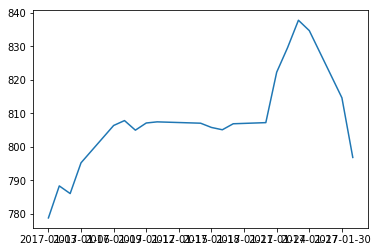

In [37]:
dataset_test.Date = pd.to_datetime(dataset_test.Date, format="%m/%d/%Y")
plt.plot(dataset_test.Date, dataset_test.Open)
plt.show()

In [38]:
# Getting the predicted stock price of January 2017 
dataset_total = pd.concat((df_train['Open'], dataset_test['Open']), axis=0) # Vertical concatenation 

In [39]:
inputs = dataset_total[len(dataset_total) -len(dataset_test) - 60:].values

In [41]:
inputs = inputs.reshape(-1, 1) # Changes shape from (80,) to (80,1)

In [42]:
inputs = sc.transform(inputs)

In [43]:
X_test = []

In [45]:
for i in range(60, 80):
    X_test.append(inputs[i-60:i,0])


In [46]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price) # Inverse the scaling of our predictions 

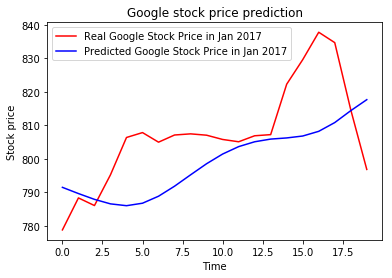

In [47]:
# Visualizing the results 
plt.plot(real_stock_price, color='red', label = 'Real Google Stock Price in Jan 2017')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price in Jan 2017')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock price')
plt.legend()
plt.show()

## <a name="SOM"> Self Organizing Maps </a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [2]:
# Importing the dataset
dataset = pd.read_csv("C:\\Users\\sridevi.tolety\\Documents\\StudyReferences\\DeepLearning_AtoZ_Udemy\\Part4_SOM_AdditionalReadings\\Credit_Card_Applications.csv")

In [3]:
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [4]:
X = dataset.iloc[:, :-1].values # we only train with X because unsupervised
y = dataset.iloc[:, -1].values

In [5]:
# Feature scaling 
from sklearn.preprocessing import MinMaxScaler

In [6]:
sc = MinMaxScaler(feature_range=(0,1))

In [7]:
X = sc.fit_transform(X)

In [8]:
# Training the SOM
from minisom import MiniSom

In [9]:
som = MiniSom(x=10, y=10, input_len=15, sigma=1, learning_rate=0.5) # x & y refer to dimensions of the map we're training 
# sigma is radius of different neighbours in the grid 

In [10]:
som.random_weights_init(X) # Randomly initialize the weights 

In [11]:
som.train_random(data=X, num_iteration=100)

In [12]:
# Visualizing the results 
from pylab import bone, pcolor, colorbar, plot, show

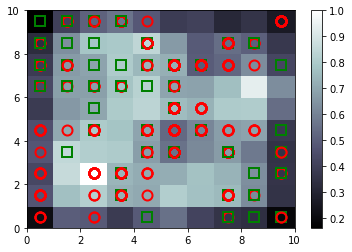

In [15]:
bone()
pcolor(som.distance_map().T) # Create a pseudocolor plot of a 2-D array.
colorbar()
# Lets add markers to distinguish between customers who did and didnt get approval 
markers = ['o', 's']
colors = ['r', 'g']

for i, x in enumerate(X):# i will be indices of customers, x will be the vector of attributes corresponding to each cust 
    w = som.winner(x) # Gives us the winning node of customer 
    plot(w[0]+0.5,
         w[1]+0.5,
        markers[y[i]],
        markeredgecolor = colors[y[i]],
        markerfacecolor = 'None',
        markersize=10, 
        markeredgewidth=2) #On this winning node, plot the marker. Adding 0.5 moves the marker to the middle of the square m

In [13]:
som.distance_map()

array([[0.21425929, 0.47355462, 0.42798006, 0.47846052, 0.45706589,
        0.38267824, 0.43617467, 0.38789212, 0.33146433, 0.16258629],
       [0.49972984, 0.76911779, 0.86232271, 0.85207374, 0.70612024,
        0.6608773 , 0.68116471, 0.66903537, 0.63440626, 0.40429532],
       [0.48661683, 0.81919041, 1.        , 0.81420464, 0.80196102,
        0.69682349, 0.68061465, 0.69201155, 0.78568288, 0.5133566 ],
       [0.38387981, 0.72255232, 0.74137507, 0.80601026, 0.78277991,
        0.8008549 , 0.77769225, 0.80620882, 0.79620455, 0.56319488],
       [0.48970765, 0.70878469, 0.71397692, 0.67801535, 0.69296137,
        0.83909295, 0.82797259, 0.7463427 , 0.84461577, 0.48400154],
       [0.552263  , 0.81514391, 0.71793517, 0.55750076, 0.53443088,
        0.7607748 , 0.69414181, 0.72390538, 0.66502307, 0.38942932],
       [0.41607584, 0.77340998, 0.77629706, 0.61921358, 0.61300595,
        0.73068667, 0.68672221, 0.49737467, 0.49205546, 0.40701443],
       [0.35783728, 0.75313687, 0.7350340

In [16]:
mappings = som.win_map(X)

In [25]:
frauds = np.concatenate((mappings[(2,3)], mappings[(8,6)]), axis=0)
frauds = sc.inverse_transform(frauds)

ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [26]:
mappings[(2,2)]

[array([0.56142458, 0.        , 0.35458647, 0.08928571, 0.5       ,
        0.15384615, 0.875     , 0.00736842, 0.        , 0.        ,
        0.        , 0.        , 0.5       , 0.13      , 0.00246   ]),
 array([0.56480425, 0.        , 0.40721805, 0.125     , 0.5       ,
        0.15384615, 0.5       , 0.01754386, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.58      , 0.        ]),
 array([4.29185237e-01, 0.00000000e+00, 7.26315789e-02, 3.57142857e-01,
        5.00000000e-01, 7.69230769e-02, 3.75000000e-01, 1.45614035e-02,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.00000000e-01, 4.00000000e-02, 4.20000000e-04]),
 array([0.87362301, 0.        , 0.37849624, 0.05946429, 0.5       ,
        0.38461538, 0.375     , 0.00877193, 0.        , 0.        ,
        0.        , 0.        , 0.5       , 0.        , 0.0039    ]),
 array([0.34498997, 0.        , 0.37593985, 0.05357143, 0.5       ,
        0.        , 0.        , 0.      

In [28]:
mappings

defaultdict(list,
            {(7,
              7): [array([0.84268147, 1.        , 0.12526316, 0.40928571, 0.5       ,
                     0.23076923, 0.375     , 0.05561404, 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.05      , 0.01212   ]), array([0.75215934, 1.        , 0.32827068, 0.02678571, 0.5       ,
                     0.23076923, 0.375     , 0.05263158, 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.1155    , 0.        ]), array([0.72114172, 1.        , 0.15533835, 0.32142857, 0.5       ,
                     0.38461538, 0.375     , 0.00877193, 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.        , 0.        ]), array([0.63723877, 1.        , 0.31954887, 0.08928571, 0.5       ,
                     0.15384615, 0.375     , 0.03508772, 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.105     , 0.        ]), array([0.98014648, 1. 

### <a name="hybrid"> Mega case study: Hybrid model </a>

#### Part 1: Identify the frauds with SOM

In [33]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [34]:
# Importing the dataset
dataset = pd.read_csv("C:\\Users\\sridevi.tolety\\Documents\\StudyReferences\\DeepLearning_AtoZ_Udemy\\Part4_SOM_AdditionalReadings\\Credit_Card_Applications.csv")

In [35]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [37]:
# Feature scaling 
from sklearn.preprocessing import MinMaxScaler 
sc = MinMaxScaler()
X = sc.fit_transform(X)

In [39]:
# Training the SOM 
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len=15, sigma=1, learning_rate=0.5)

In [40]:
som.random_weights_init(X)
som.train_random(X, num_iteration=100)

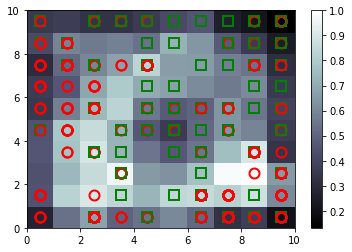

In [43]:
# Visualizing the results 
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']

for i, x in enumerate(X):# i will be indices of customers, x will be the vector of attributes corresponding to each cust 
    w = som.winner(x) # Gives us the winning node of customer 
    plot(w[0]+0.5,
         w[1]+0.5,
        markers[y[i]],
        markeredgecolor = colors[y[i]],
        markerfacecolor = 'None',
        markersize=10, 
        markeredgewidth=2) #On this winning node, plot the marker. Adding 0.5 moves the marker to the middle of the square m

In [44]:
# Finding the frauds 
mappings = som.win_map(X)
mappings

defaultdict(list,
            {(6,
              0): [array([0.84268147, 1.        , 0.12526316, 0.40928571, 0.5       ,
                     0.23076923, 0.375     , 0.05561404, 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.05      , 0.01212   ]), array([0.72114172, 1.        , 0.15533835, 0.32142857, 0.5       ,
                     0.38461538, 0.375     , 0.00877193, 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.        , 0.        ]), array([0.7289622 , 1.        , 0.31954887, 0.12053571, 0.5       ,
                     0.53846154, 0.875     , 0.29087719, 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.        , 0.        ]), array([0.89100585, 1.        , 0.09398496, 0.39446429, 0.5       ,
                     0.53846154, 0.375     , 0.07017544, 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.068     , 0.        ]), array([7.74515575e-01,

In [45]:
frauds = np.concatenate((mappings[(7,2)], mappings[(8,2)]), axis=0)

ValueError: all the input arrays must have same number of dimensions

#### Part 2: Going from unsupervised to supervised deep learning

### <a name="bm"> Boltzmann Machines </a>

In [2]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
from torch.autograd import Variable

In [3]:
# Importing the dataset 
path = "C://Users//sridevi.tolety//Documents//StudyReferences//DeepLearning_AtoZ_Udemy//Part5_BM_AdditionalReadings//Boltzmann_Machines//"
movies = pd.read_csv(path+"ml-1m//movies.dat",sep = "::", header=None, engine= 'python', encoding = "latin-1")
users = pd.read_csv(path+"ml-1m//users.dat", sep = "::", header=None, engine= 'python', encoding = "latin-1")
ratings=pd.read_csv(path+"ml-1m//ratings.dat",sep = "::", header=None, engine= 'python', encoding = "latin-1")

# Preparing the training set and test set 

#The data folder ml-1m contains files u1 base, u1 test, u2 base, u2 test etc which are train test splits of the whole dataset.
# This is for k-fold cross validation 

training_set = pd.read_csv(path+"ml-100k//u1.base", header = None, delimiter='\t')

# For pytorch tensors we need arrays instead of dataframes 
training_set = np.array(training_set, dtype = 'int') # now an array of (80000, 4)

test_set = pd.read_csv(path+"ml-100k//u1.test", header = None, delimiter='\t')
test_set = np.array(test_set, dtype = 'int') # now an array of (20000, 4)

In [4]:
movies.head(3) # Columns are Movie ID, mMovie name and Genre

,0,1,2
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
users.head(3) # Columns are:  User ID, Gender, Age, USer job codes, zip code 

,0,1,2,3,4
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [7]:
ratings.head(3) # Columns are Users ID, Movie ID, Rating, Time Steps 

,0,1,2,3
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [9]:
training_set.head(3) # This has 80% of the ratings data 

,0,1,2,3
0,1,1,5,874965758
1,1,2,3,876893171
2,1,3,4,878542960
3,1,4,3,876893119
4,1,5,3,889751712


In [11]:

test_set.head(3)

,0,1,2,3
0,1,6,5,887431973
1,1,10,3,875693118
2,1,12,5,878542960
3,1,14,5,874965706
4,1,17,3,875073198


Getting the number of users and movies.
Now we want to convert training set and test set into matrices where the rows will be the users, columns are movies, and cells are the ratings.

We will write a function for this, and make it applicable across all train test splits above 

In [13]:
# What is the maximum number of users that we have 
print(max(training_set[:,0]))
print(max(test_set[:,0]))
nb_users = int(max(max(training_set[:,0]), max(test_set[:,0])))

print(max(training_set[:,1]))
print(max(test_set[:,1]))
nb_movies = int(max(max(training_set[:,1]), max(test_set[:,1]))) # 1682 is total no. of movies 

943
462


1682
1591


In [15]:
# We'll make a list of lists
# 943 lists, each of which will be a list of 1682 elements (movies)
def convert(data):
    """Convert ratings data to have users in rows and movies in columns, with cells containing ratings"""
    new_data = []
    for user_id in range(1, nb_users+1):
        movie_id = data[:,1][data[:,0]==user_id]# Take column containing all movie ids, and list movie ids of first user
        ratings_id = df[:,2][df[:,0]==user_id]
        ratings = np.zeros(nb_movies)
        ratings[movie_id - 1] = ratings_id
        new_data.append(list(ratings))
    return(new_data)
training_set = convert(training_set)
test_set = convert(test_set)        

In [16]:
# Converting the data into Torch tensors 
# Training and test set each will be converteed to two separate multidimensional matrices
training_set = torch.FloatTensor(training_set)
test_set = torch.FloatTensor(test_set)

In [17]:
# Convert the ratings into binary ratings 1 (Liked) or 0 (Not liked)


training_set[training_set==0] = -1 # Pick up all 0 vlaues and replace them by -1 (not rated)
training_set[training_set==1] = 0 # 1 star and 2 star movies are given 0 
training_set[training_set==2] = 0
training_set[training_set>=3] = 1

test_set[test_set==0] = -1 # Pick up all 0 vlaues and replace them by -1 (not rated)
test_set[test_set==1] = 0 # 1 star and 2 star movies are given 0 
test_set[test_set==2] = 0
test_set[test_set>=3] = 1

In [18]:
# Creating the architecture of the Neural network 
# See paper Fisher & Igel ALgorithm 1 
# This is Bernoulli RBM (returns either 0 or 1)
class RBM():
    def __init__(self, nv, nh): # nv: No. of visible nodes, nh: No. of hidden nodes 
        self.W = torch.randn(nh,nv) # Parms of probs of visible nodes given the hidden nodes, normally dist b/w 0 & 1
        self.a = torch.randn(1, nh) # Biases for hidden nodes. 2-d tensor, 1st dim is batch, 2nd dim is bias 
        self.b = torch.randn(1, nv) # Bias for visible nodes
    def sample_h(self, x):# Function to sample the hidden nodes according the probabilities p_h_given_v
        wx = torch.mm(x, self.W.t()) # Cant do direct matrix multiplication of torch tensors, so use torch.mm
        activation = wx + self.a.expand_as(wx) # THis is just WX+b. expand_as ensures bias is applied to each line of mini batch
        p_h_given_v = torch.sigmoid(activation) # This is the activation function 
        return(p_h_given_v, torch.bernoulli(p_h_given_v))# Return the probability as well as sample of all hidden nodes 
    def sample_v(self, y):#Function to sample visible nodes
        wx = torch.mm(y, self.W.t())
        activation = wy + self.b.expand_as(wy)
        p_v_given_h = torch.sigmoid(activation)
        return(p_v_given_h, torch.bernoulli(p_v_given_h))
    def train(self, v0, vk, ph0, phk):
        self.W += torch.mm(v0.t(), ph0) - torch.mm(vk.t(), phk)
        self.b += torch.sum((v0 - vk), 0)
        self.a += torch.sum((ph0 - phk), 0)

In [20]:
nv = len(training_set[0]) # 1682, i.e. No. of visible nodes is number of movies from trainign set 

In [21]:
nh = 100  # No. of hidden nodes. COuld be genres, class, actors or anything

In [22]:
batch_size = 100 # Won't update the weights after each observation, but after several observations that all go into the batch. 

In [23]:
rbm = RBM(nv, nh)

In [25]:
# Training the RBM
nb_epoch = 10 
# Make a for loop that will go through the 10 epochs and update weights after obs of each batch are passed
for epoch in range(1, nb_epoch+1):
    # Need a loss function to compare predictions to ratinggs (of training set)
    train_loss = 0
    # Divide the train loss by a counter to normalize it 
    s = 0.
    # Loop over every batch of users(0-99, 100-199 etc). Last batch of users will be 
    for user_id in range(0, nb_users-batch_size, batch_size):
        vk = training_set[user_id: user_id+batch_size]
        v0 = training_set[user_id: user_id+batch_size] # Target
        ph0,_ = rbm.sample_h(v0)
        for k in range(10):
            _,hk = rbm.sample_h(vk)
            _,vk = rbm.sample_v(hk)
            vk[v0<0] = v0[v0<0]
        phk,_ = rbm.sample_h(vk)
        rbm.train(v0, vk, pho, phk)
        train_loss += torch.mean(torch.abs(v0[v0>=0] - vk[v0>=0]))
        s += 1.
    print('epoch: '+str(epoch)+' loss: '+str(train_loss/s))

RuntimeError: size mismatch, m1: [100 x 100], m2: [1682 x 100] at c:\a\w\1\s\tmp_conda_3.6_091443\conda\conda-bld\pytorch_1544087948354\work\aten\src\th\generic/THTensorMath.cpp:940

## <a name="autoencoders"> AutoEncoders </a>

In [5]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
from torch.autograd import Variable

In [6]:
# Importing the dataset 
path = "C://Users//sridevi.tolety//Documents//StudyReferences//DeepLearning_AtoZ_Udemy//Part5_BM_AdditionalReadings//Boltzmann_Machines//"
movies = pd.read_csv(path+"ml-1m//movies.dat",sep = "::", header=None, engine= 'python', encoding = "latin-1")
users = pd.read_csv(path+"ml-1m//users.dat", sep = "::", header=None, engine= 'python', encoding = "latin-1")
ratings=pd.read_csv(path+"ml-1m//ratings.dat",sep = "::", header=None, engine= 'python', encoding = "latin-1")

# Preparing the training set and test set 

#The data folder ml-1m contains files u1 base, u1 test, u2 base, u2 test etc which are train test splits of the whole dataset.
# This is for k-fold cross validation 

training_set = pd.read_csv(path+"ml-100k//u1.base", header = None, delimiter='\t')

# For pytorch tensors we need arrays instead of dataframes 
training_set = np.array(training_set, dtype = 'int') # now an array of (80000, 4)

test_set = pd.read_csv(path+"ml-100k//u1.test", header = None, delimiter='\t')
test_set = np.array(test_set, dtype = 'int') # now an array of (20000, 4)

In [8]:
# What is the maximum number of users that we have 
nb_users = int(max(max(training_set[:,0]), max(test_set[:,0])))

nb_movies = int(max(max(training_set[:,1]), max(test_set[:,1]))) # 1682 is total no. of movies 

In [12]:
# We'll make a list of lists
# 943 lists, each of which will be a list of 1682 elements (movies)
def convert(data):
    """Convert ratings data to have users in rows and movies in columns, with cells containing ratings"""
    new_data = []
    for user_id in range(1, nb_users+1):
        movie_id = data[:,1][data[:,0]==user_id]# Take column containing all movie ids, and list movie ids of first user
        ratings_id = data[:,2][data[:,0]==user_id]
        ratings = np.zeros(nb_movies)
        ratings[movie_id - 1] = ratings_id
        new_data.append(list(ratings))
    return(new_data)
training_set = convert(training_set)
test_set = convert(test_set)        

In [13]:
# Converting the data into Torch tensors 
# Training and test set each will be converteed to two separate multidimensional matrices
training_set = torch.FloatTensor(training_set)
test_set = torch.FloatTensor(test_set)

In [14]:
training_set

tensor([[5., 3., 4.,  ..., 0., 0., 0.],
        [4., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [5., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 5., 0.,  ..., 0., 0., 0.]])

In [15]:
# Create the architecture of the neural network 

# We'll make a class for the autoencoder 
# We're going to use inherticance. We'll create a class SAE (Stacked AutoEncoder) that is going to be the child class of an
# existing parent class in pytorch (so we can use all variables and functions from parent class module, like optimizer fn, 
# criterion, tools to make full connection etc)

class SAE(nn.Module):
    def __init__(self, ):
        # The super function is used when we want to use inherited methods from the parent class
        super(SAE, self).__init__()  
        # Now starting full connection layers. Lets create 5 objects (4->linear fn, 1-> activation)
        # In each layer, 1st argument is features, 2nd argument is no. of units 
        self.fc1 = nn.Linear(nb_movies, 20) #20 nodes in 1st hidden layer. e.g. could be a genre, actor, theme etc 
        self.fc2 = nn.Linear(20, 10) # 10 neurons, more features based on previous features 
        self.fc2 = nn.Linear(10, 20) # Starting decoding to the original features 
        self.fc4 = nn.Linear(20,nb_movies)
        self.activation = nn.Sigmoid() # Getting activation fn from parent class 
        self.activation_t = nn.Tanh()
    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation_t(self.fc2(x))
        x = self.activation(self.fc3(x))
        x = self.fc4(x)
        return(x)

In [16]:
sae = SAE()
criterion = nn.MSELoss()
optimizer = optim.Adam(sae.parameters(), lr=0.01, weight_decay=0.5)

In [17]:
nb_epoch = 100

In [18]:
for epoch in range(1, nb_epoch+1):
    train_loss = 0 
    # TO reduce computation, use only users who rated at least one movie 
    s = 0. # RMSE needs a float 
    for user_id in range(nb_users):
        input = Variable(training_set[user_id,:]).unsqueeze(0) 
        # Weights are updated after each input vector 
        target = input.clone() # target is the input 
        if torch.sum(target.data>0) >0:
            # if the user has rated at least one movie 
            output = sae(input) # predicted ratigns are returned for this user 
            target.require_grad = False # gradient is a clone of input so now gradient wont be calculated
            output[target==0] = 0 # These are 0s so dont need to be included in computation 
            loss = criterion(output, input)
            mean_corrector = nb_movies/float(torch.sum(target.data > 0) + 1e-10) #denominator should not be zero
            # it is the average of the error with non-zero ratings
            loss.backward()
            train_loss += np.sqrt(loss.data[0]*mean_corrector) #loss.data[0] is the loss value
            s+=1
            optimizer.step()
            # backward decides the direction(increased or decreased) of the weights and optimizer decides their intensities
    print('epoch: '+str(epoch)+ 'loss: '+ str(train_loss/s)) #train loss divided by number of users with atleast one rating

RuntimeError: size mismatch, m1: [1 x 20], m2: [10 x 20] at c:\a\w\1\s\tmp_conda_3.6_091443\conda\conda-bld\pytorch_1544087948354\work\aten\src\th\generic/THTensorMath.cpp:940

In [ ]:
test_loss = 0
s = 0.
for id_user in range(nb_users):
    input = Variable(training_set[id_user,:]).unsqueeze(0) #because we are predicting ratings for that user
    target = Variable(test_set[id_user,:]).unsqueeze(0)
    if torch.sum(target.data > 0) > 0:
        s+=1.
        output = sae(input)
        target.require_grad = False
        output[target == 0] = 0
        pred_loss = criterion(output, target)
        mean_corrector = nb_movies/float(torch.sum(target.data > 0) + 1e-10)
        test_loss += np.sqrt(pred_loss.data[0]*mean_corrector)
print('test loss: '+ str(test_loss/s))

# PLAYGROUND

In [9]:
def pooling(mat,ksize,method='max',pad=False):
    '''Non-overlapping pooling on 2D or 3D data.

    <mat>: ndarray, input array to pool.
    <ksize>: tuple of 2, kernel size in (ky, kx).
    <method>: str, 'max for max-pooling, 
                   'mean' for mean-pooling.
    <pad>: bool, pad <mat> or not. If no pad, output has size
           n//f, n being <mat> size, f being kernel size.
           if pad, output has size ceil(n/f).

    Return <result>: pooled matrix.
    '''

    m, n = mat.shape[:2]
    ky,kx=ksize

    _ceil=lambda x,y: int(numpy.ceil(x/float(y)))

    if pad:
        ny=_ceil(m,ky)
        nx=_ceil(n,kx)
        size=(ny*ky, nx*kx)+mat.shape[2:]
        mat_pad=numpy.full(size,numpy.nan)
        mat_pad[:m,:n,...]=mat
    else:
        ny=m//ky
        nx=n//kx
        mat_pad=mat[:ny*ky, :nx*kx, ...]

    new_shape=(ny,ky,nx,kx)+mat.shape[2:]

    if method=='max':
        result=numpy.nanmax(mat_pad.reshape(new_shape),axis=(1,3))
    else:
        result=numpy.nanmean(mat_pad.reshape(new_shape),axis=(1,3))

In [10]:
a = np.array([
      [  20,  200,   -5,   23],
      [ -13,  134,  119,  100],
      [ 120,   32,   49,   25],
      [-120,   12,    9,   23]
])

In [11]:
a.shape

(4, 4)

In [12]:
pooling(a,ksize=2,method='max',pad=False)

TypeError: 'int' object is not iterable

In [29]:
import numpy as np
def minpool(feature_map, size=2, stride=2):
    #Preparing the output of the pooling operation.
    pool_out = np.zeros((np.uint16((feature_map.shape[0]-size+1)/stride),np.uint16((feature_map.shape[1]-size+1)/stride), feature_map.shape[-1]))
    for map_num in range(feature_map.shape[-1]):
        r2 = 0
        for r in np.arange(0,feature_map.shape[0]-size-1, stride):
            c2 = 0
            for c in np.arange(0, feature_map.shape[1]-size-1, stride):
                pool_out[r2, c2, map_num] = np.min(feature_map[r:r+size,  c:c+size])
                pool_out[r2, c2, map_num] = np.min([feature_map[r:r+size,  c:c+size]])
                c2 = c2 + 1
            r2 = r2 +1  
        return(pool_out)
    

In [30]:
feature_map = np.array([[  20,  200,   -5,   23], [ -13,  134,  119,  100], [ 120,   32,   49,   25], [-120,   12,   9,   23]])
size=2
stride=2

In [31]:
minpool(x)

array([[[-13.,   0.,   0.,   0.]]])

In [21]:
pool_out = np.zeros((np.uint16((feature_map.shape[0]-size+1)/stride),np.uint16((feature_map.shape[1]-size+1)/stride), feature_map.shape[-1]))

In [23]:
print(list(range(feature_map.shape[-1])))

[0, 1, 2, 3]


In [24]:
np.arange(0,feature_map.shape[0]-size-1, stride)

array([0])

In [25]:
feature_map.shape[0]

4

In [28]:
pool_out[0, 0, 1] = 

0.0

In [ ]:
r = np.min(feature_map[r:r+size,  c:c+size])